In [84]:
import pandas as pd

wiki = pd.read_csv("C:/Users/Daniel/Documents/maestria UVG/text mining y analisis de sentimiento/tarea1/tarea1/base.csv")
base = wiki[['Title','Corpus']]
base.head()

,Title,Corpus
0,DJ AM,"\n,\n,Adam Michael Goldstein (March 30, 1973 –..."
1,"Princess Louise, Duchess of Argyll","\n,Princess Louise, Duchess of Argyll, VA, CI,..."
2,Elias Ashmole,"\n\n,Elias Ashmole FRS (/ɪlaɪʌs æʃmoʊl/; 23 Ma..."
3,"Albert Stanley, 1st Baron Ashfield","\n\n,Albert Henry Stanley, 1st Baron Ashfield,..."
4,Harriet Arbuthnot,"\n\n,Harriet Arbuthnot (10 September 1793 – 2 ..."


In [83]:
import re as re

new_corpus = list()
for text in base['Corpus']:
    new_corpus.append(
        re.split('\W+',
                 re.sub('\r+|\n+|,|\s{2,}|\t|\[\d+\]','',text.lower())
                )
    )
base_clean = pd.DataFrame(data={'Title':base['Title'],'Corpus':new_corpus})
base_clean.head()

,Title,Corpus,Tokens,Vocabulary
0,DJ AM,"[adam, michael, goldstein, march, 30, 1973, au...",2965,1017
1,"Princess Louise, Duchess of Argyll","[princess, louise, duchess, of, argyll, va, ci...",2965,1017
2,Elias Ashmole,"[elias, ashmole, frs, ɪlaɪʌs, æʃmoʊl, 23, may,...",2965,1017
3,"Albert Stanley, 1st Baron Ashfield","[albert, henry, stanley, 1st, baron, ashfield,...",2965,1017
4,Harriet Arbuthnot,"[harriet, arbuthnot, 10, september, 1793, 2, a...",2965,1017


In [85]:
vocabulary=list()
tokens=list()
for i in base_clean['Corpus']:
    tokens.append(len(i))
    vocabulary.append(len(set(i)))
base_clean['Tokens'] = tokens
base_clean['Vocabulary'] = vocabulary

In [87]:
base_clean.head(25)

,Title,Corpus,Tokens,Vocabulary
0,DJ AM,"[adam, michael, goldstein, march, 30, 1973, au...",2965,1017
1,"Princess Louise, Duchess of Argyll","[princess, louise, duchess, of, argyll, va, ci...",5949,1735
2,Elias Ashmole,"[elias, ashmole, frs, ɪlaɪʌs, æʃmoʊl, 23, may,...",2987,1062
3,"Albert Stanley, 1st Baron Ashfield","[albert, henry, stanley, 1st, baron, ashfield,...",2819,991
4,Harriet Arbuthnot,"[harriet, arbuthnot, 10, september, 1793, 2, a...",2233,812
5,Archimedes,"[archimedes, of, syracuse, ˌɑːrkɪˈmiːdiːz, anc...",4923,1470
6,Carlos Castillo Armas,"[carlos, castillo, armas, locally, kaɾlos, kas...",5205,1459
7,Yasser Arafat,"[mohammed, yasser, abdel, rahman, abdel, raouf...",9859,2490
8,Marshall Applewhite,"[marshall, herff, applewhite, jr, may, 17, 193...",5651,1645
9,Anthony Roll,"[the, anthony, roll, is, a, paper, record, of,...",3290,1053


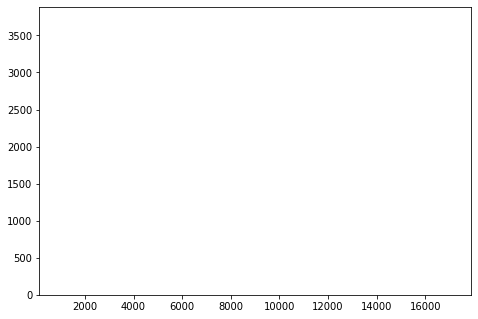

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tokens = base_clean['Tokens']
vocabulary = base_clean['Vocabulary']
ax.bar(tokens,vocabulary)
plt.show()